Este notebook busca los ceros de la transformación del grupo de renormalización para el modelo de Ising en dos dimensiones. La relación de recurrencia para este problema es K'=(3/8) ln(cosh(4K)). Recuerden ejecutar cada celda con SHIFT+ENTER.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Definimos la función a la que le queremos buscar los ceros
def f(x):
    return x - 3*np.log(np.cosh(4*x))/8

# Usamos el método de la secante para encontrar el cero
x = 1 # Guess inicial
x0 = newton(f, x, tol=1.48e-08)
print('Cero de la función:', x0)

Cero de la función: 0.5069810190775701


In [2]:
# Verifiquemos el valor de la función en x0
f(x0)

-1.5543122344752192e-15

In [3]:
# Comparemos contra los resultados exactos, y de campo medio
print('kTc/J (Bragg-Williams) =', 4)
print('kTc/J (Bethe)          =', 2/np.log(2))
print('kTc/J (RG)             =', 1/x0)
print('kTc/J (exacto)         =', 2/np.arctanh(np.sqrt(.5)))

kTc/J (Bragg-Williams) = 4
kTc/J (Bethe)          = 2.8853900817779268
kTc/J (RG)             = 1.9724604321863104
kTc/J (exacto)         = 2.2691853142130216


Veamos que este un punto fijo inestable. Perturbamos ligeramente al valor alrededor del cero, e iteramos la transformación del grupo de renormalización.

In [4]:
nit = 100  # Número de interaciones
eps = -1e-8 # Amplitud de la perturbación inicial

kp = np.zeros(nit)
k  = np.zeros(nit)

# Iteramos la transformación desde el entorno del punto fijo
k[0]  = x0 + eps
kp[0] = k[0]
for i in range(1,nit):
    k[i]  = kp[i-1]
    kp[i] = 3*np.log(np.cosh(4*k[i-1]))/8

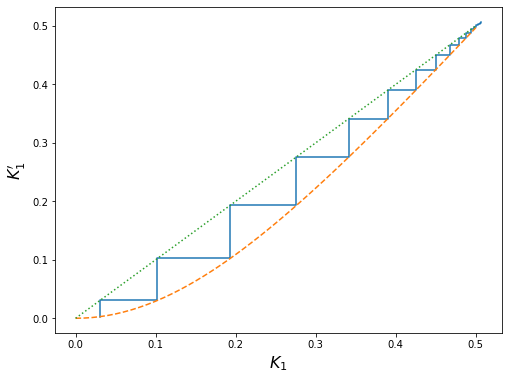

In [5]:
# Graficamos el resultado
plt.figure(figsize=(8,6))
x = np.arange(0,np.max(k),.01)
plt.plot(k,kp)
plt.plot(x,3*np.log(np.cosh(4*x))/8,'--')
plt.plot(x,x,':')
plt.xlabel(r'$K_1$',fontsize=16)
plt.ylabel(r'$K^\prime_1$',fontsize=16)
plt.show()